In [2]:
#Lets Import Important Libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
#from imblearn.combine import SMOTETome - Class to perform over-sampling using SMOTE (Synthetic Minority Oversampling Technique).
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.drop(['Time'],axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Here the values of Amount column are not scaled so  lets scale them first.

In [4]:
from sklearn.preprocessing import StandardScaler
df['norm_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,norm_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964


In [5]:
df.drop(['Amount'],axis=1,inplace=True)

Lets see if there is any missing value.

In [6]:
print("The missing values in different columns are: ")
print(df.isnull().sum())

The missing values in different columns are: 
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Class          0
norm_amount    0
dtype: int64


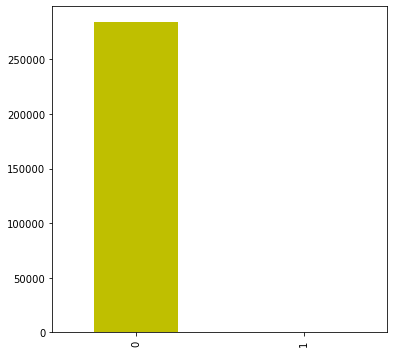

In [7]:
show = df['Class'].value_counts()
show.plot(kind='bar',figsize=(6,6),color='y')

In [8]:
show

0    284315
1       492
Name: Class, dtype: int64

In [9]:
print('The percentage of no frauds is in the provided data is : ',show[0]/show.sum() * 100,'%')
print('The percentage of frauds in the provided data is: ',show[1]/show.sum() * 100,'%')

The percentage of no frauds is in the provided data is :  99.82725143693798 %
The percentage of frauds in the provided data is:  0.1727485630620034 %


In [10]:
frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0]
print(frauds.shape)
print(non_frauds.shape)

(492, 30)
(284315, 30)


The data is clearly imbalanced. TO solve this we can either perfom undersampling or oversampling. In this notebook we will perform oversampling.

In [11]:
X = df.drop(['Class'],axis=1)
X[:5]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,norm_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [12]:
Y = df[['Class']]
Y[:5]

,Class
0,0
1,0
2,0
3,0
4,0


In [13]:
ros =  RandomOverSampler(sampling_strategy=0.5) #To perform Oversampling
ros

RandomOverSampler(sampling_strategy=0.5)

In [14]:
Xs, ys = ros.fit_sample(X, Y)
print(Xs.shape)
print(ys.shape)

(426472, 29)
(426472, 1)


In [15]:
ys['Class'].value_counts()

0    284315
1    142157
Name: Class, dtype: int64

In [16]:
Xs = Xs.values
ys = ys.values
print(Xs[:1])
print(ys[:3])

[[-1.35980713 -0.07278117  2.53634674  1.37815522 -0.33832077  0.46238778
   0.23959855  0.0986979   0.36378697  0.09079417 -0.55159953 -0.61780086
  -0.99138985 -0.31116935  1.46817697 -0.47040053  0.20797124  0.02579058
   0.40399296  0.2514121  -0.01830678  0.27783758 -0.11047391  0.06692807
   0.12853936 -0.18911484  0.13355838 -0.02105305  0.24496426]]
[[0]
 [0]
 [0]]


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size = 0.25, random_state = 16)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(319854, 29)
(106618, 29)
(319854, 1)
(106618, 1)


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_X = scaler.fit_transform(X_train)
test_X = scaler.transform(X_test)

Now we will perform classification using Support Vector Machine(SVM).

In [20]:
from sklearn.svm import SVC

In [35]:
classifier = SVC(kernel = 'rbf')
classifier

SVC()

In [36]:
classifier.fit(train_X, y_train)

SVC()

In [37]:
y_pred = classifier.predict(test_X)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [38]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, auc

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_pr = auc(recall, precision)
auc_pr


0.9620078467357425

In [40]:
print("Accuracy of Model on test data:  ", accuracy_score(y_test, y_pred) *  100)

Accuracy of Model on test data:   96.3927291826896


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     70990
           1       0.99      0.90      0.94     35628

    accuracy                           0.96    106618
   macro avg       0.97      0.95      0.96    106618
weighted avg       0.97      0.96      0.96    106618



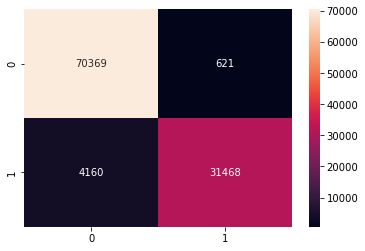

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")